#Import Libraries

In [1]:
#Environment Setup
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.2 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Download Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [59]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ SmartInternz/survey.csv')

##Load Dataset

In [60]:
# Display the first few rows of the DataFrame
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [61]:
# Display the last few rows of the DataFrame
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [62]:
# Get the shape of the DataFrame (number of rows and columns)
data.shape

(1259, 27)

In [63]:
# Display concise summary of the DataFrame including column data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#Data Pre-Processing

##Removing Unnecessary Columns

<Axes: xlabel='Country'>

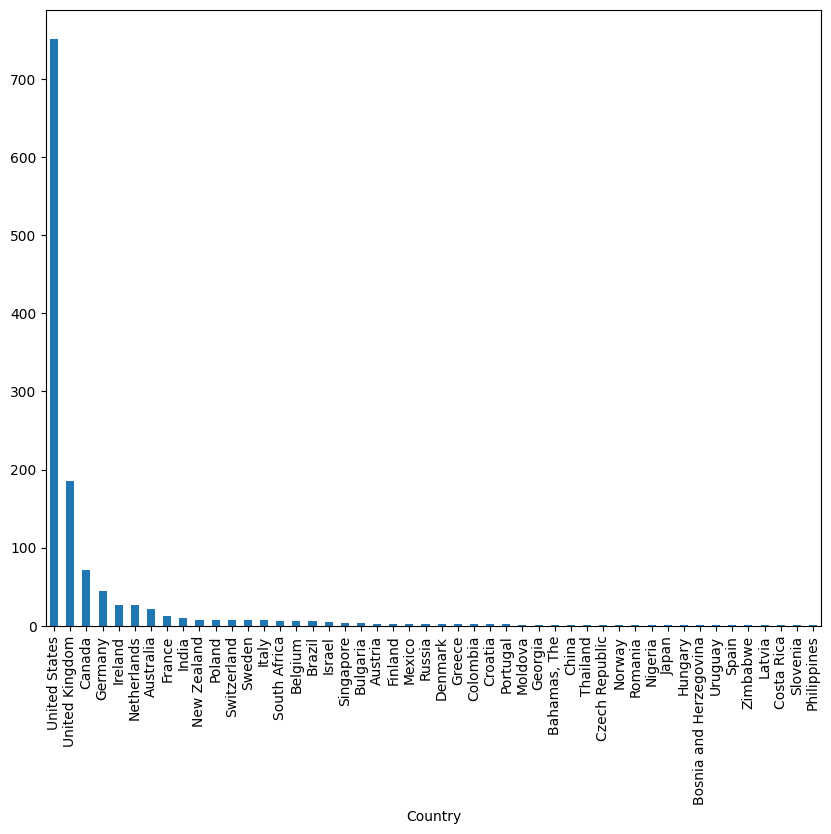

In [64]:
# Plot a bar chart to visualize the distribution of values in the 'Country' column
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

We are removing the country column since the countries are not evenly distributed, keeping this column will induce bias in our model.  

(as the above graph shows)

So we will be removing country and state columns.  

We will also remove timestamp and comments columns as they do not contribute to providing relevant information.


In [65]:
# Remove columns 'Timestamp', 'Country', 'state', and 'comments' from the DataFrame
data.drop(['Timestamp','Country','state','comments'],axis=1, inplace=True)

In [66]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


##Handling Null Values And Dealing With Wrongly Entered Data

In [67]:
# Count the number of missing values in each column of the DataFrame
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [68]:
# Count the occurrences of different values in the 'self_employed' column
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [69]:
# Fill missing values in the 'self_employed' column with the mode (most frequent value)
data['self_employed'].fillna(data['self_employed'].mode()[0], inplace=True)

In [70]:
# Count the occurrences of different values in the 'work_interfere' column
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [71]:
# Fill missing values in the 'work_interfere' column with the mode (most frequent value)
data['work_interfere'].fillna(data['work_interfere'].mode()[0], inplace=True)

<Axes: xlabel='Age'>

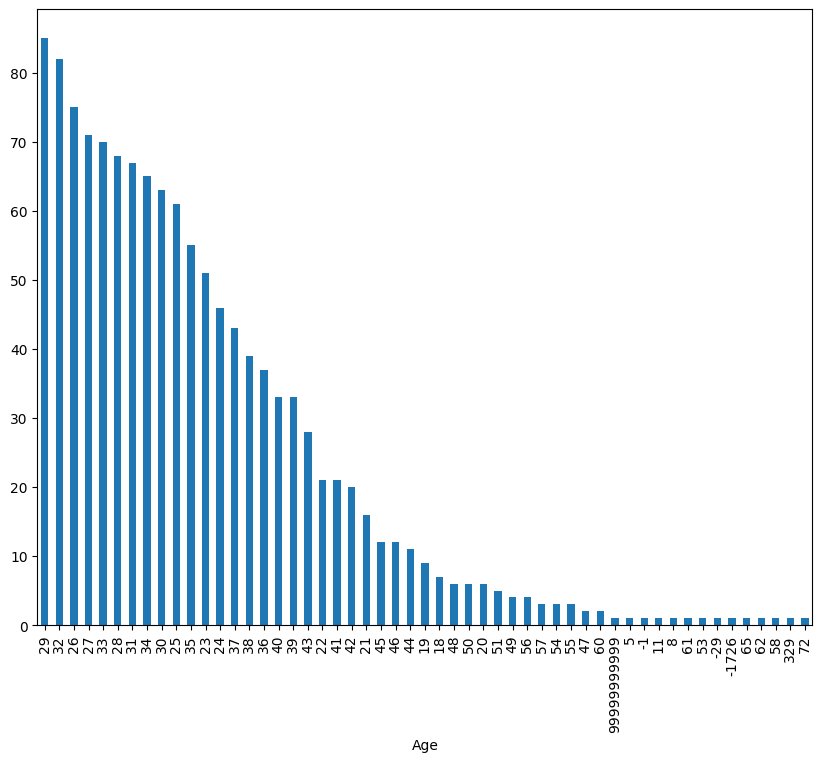

In [72]:
# Plot a bar chart to visualize the distribution of values in the 'Age' column
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [73]:
# Remove rows where the 'Age' column contains values outside the range of 18 to 60
data.drop(data[(data['Age']>60) | (data['Age']<18)].index, inplace=True)

<Axes: xlabel='Gender'>

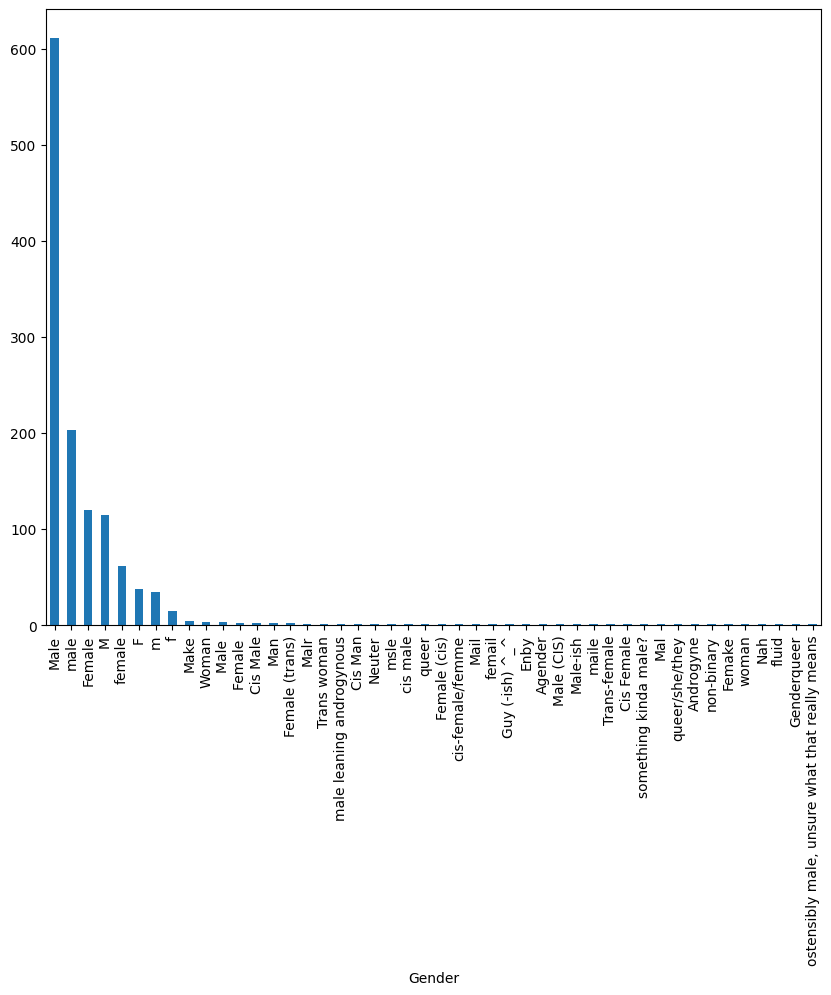

In [74]:
# Plot a bar chart to visualize the distribution of values in the 'Gender' column
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [75]:
# Standardize gender categories to 'Male', 'Female', and 'Non-Binary'
data['Gender'].replace(['Male', 'male', 'M', 'm', 'Male', 'Cis Male',
'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)', 'woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah', 'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace = True)

#Data Analysis And Visualization

##Univariate Analysis

<ipython-input-20-fd12288625f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

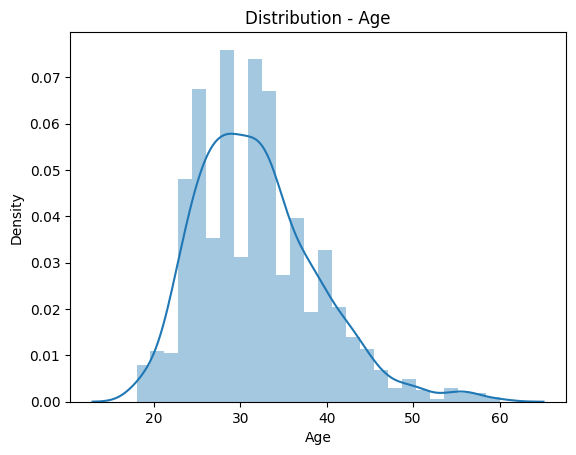

In [ ]:
# Create a seaborn distribution plot to visualize the distribution of ages
sb.distplot(data["Age"])
plt.title("Distribution - Age")
plt.xlabel("Age")

##Bivariate Analysis

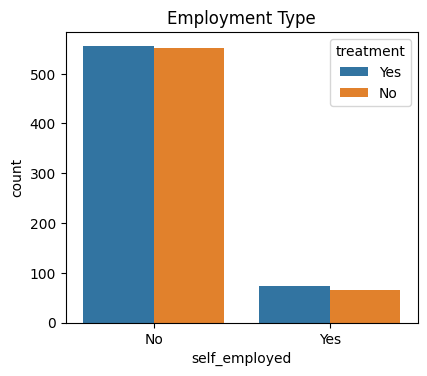

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different employment types
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x='self_employed', hue='treatment', data=data)
plt.title('Employment Type')
plt.show()

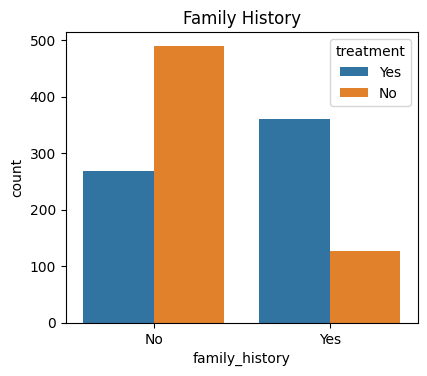

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different family history categories
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(x='family_history',hue='treatment',data=data)
plt.title('Family History')
plt.show()

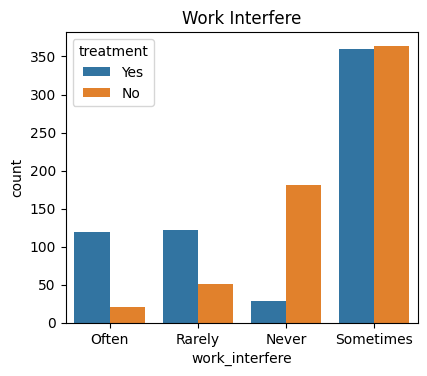

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of work interference
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(x='work_interfere',hue='treatment',data=data)
plt.title('Work Interfere')
plt.show()

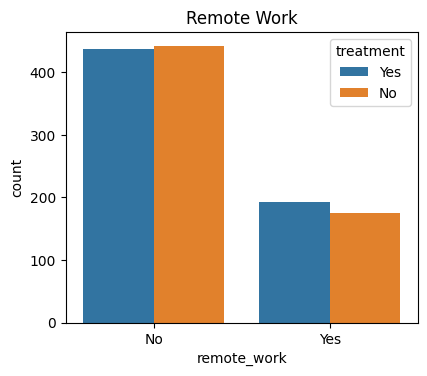

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of remote work
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(x='remote_work',hue='treatment',data=data)
plt.title('Remote Work')
plt.show()

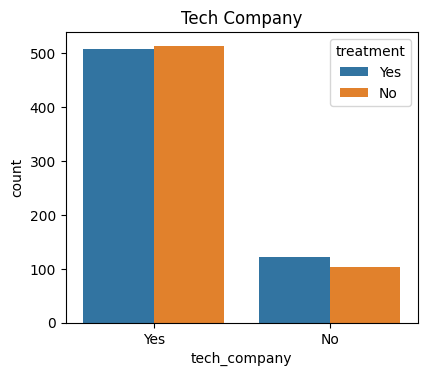

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of tech company affiliation
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(x='tech_company',hue='treatment',data=data)
plt.title('Tech Company')
plt.show()

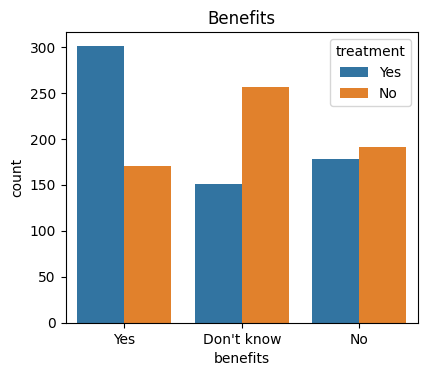

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of benefits
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(x='benefits',hue='treatment',data=data)
plt.title('Benefits')
plt.show()

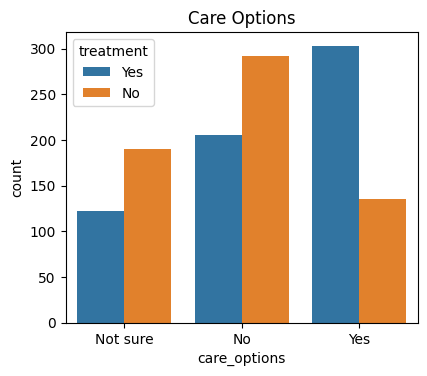

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of Care Options
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(x='care_options',hue='treatment',data=data)
plt.title('Care Options')
plt.show()

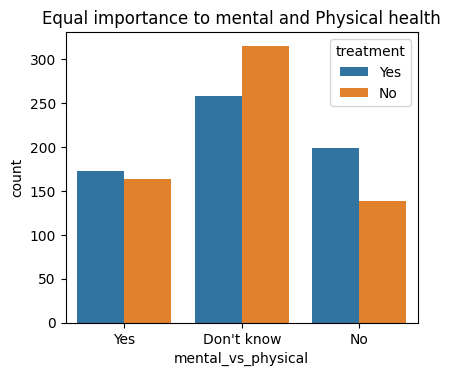

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of Equal importance to mental and physical health
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(x='mental_vs_physical',hue='treatment',data=data)
plt.title('Equal importance to mental and Physical health')
plt.show()

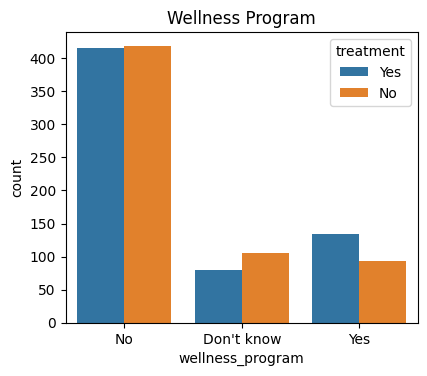

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of Wellnes Program
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(x='wellness_program',hue='treatment',data=data)
plt.title('Wellness Program')
plt.show()

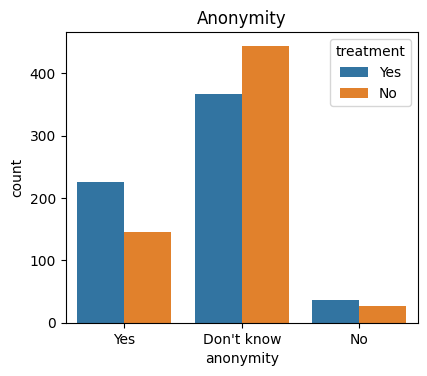

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of Anonymity
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(x='anonymity',hue='treatment',data=data)
plt.title('Anonymity')
plt.show()

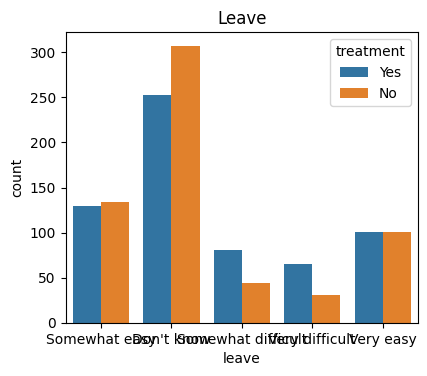

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of leave
plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sb.countplot(x='leave',hue='treatment',data=data)
plt.title('Leave')
plt.show()

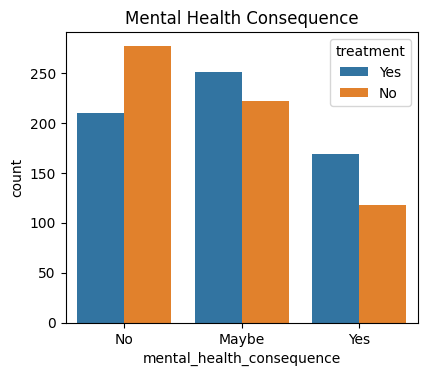

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of mental health consequence
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(x='mental_health_consequence',hue='treatment',data=data)
plt.title('Mental Health Consequence')
plt.show()

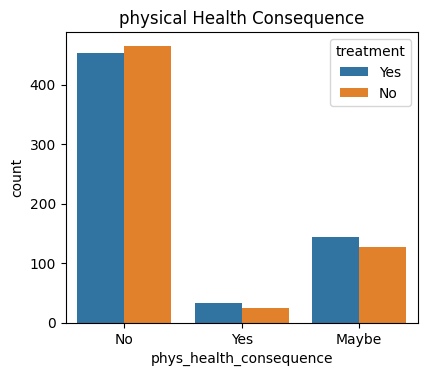

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of physical health conequence
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(x='phys_health_consequence',hue='treatment',data=data)
plt.title('physical Health Consequence')
plt.show()

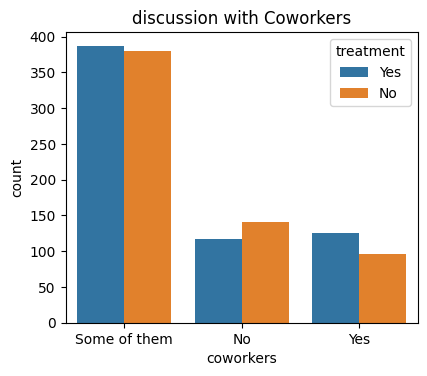

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of discussion with coworkers
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(x='coworkers',hue='treatment',data=data)
plt.title('discussion with Coworkers')
plt.show()

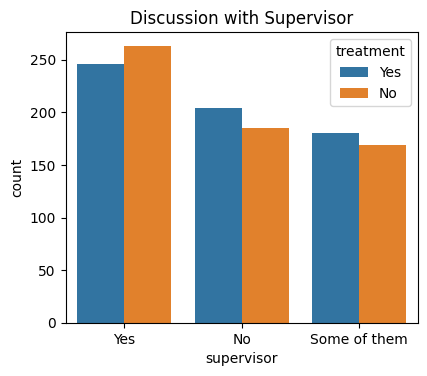

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of discussion with supervisor
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(x='supervisor',hue='treatment',data=data)
plt.title('Discussion with Supervisor')
plt.show()

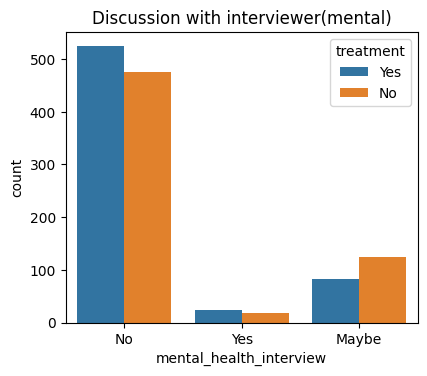

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of discussion with interviewer(mental)
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(x='mental_health_interview',hue='treatment',data=data)
plt.title('Discussion with interviewer(mental)')
plt.show()

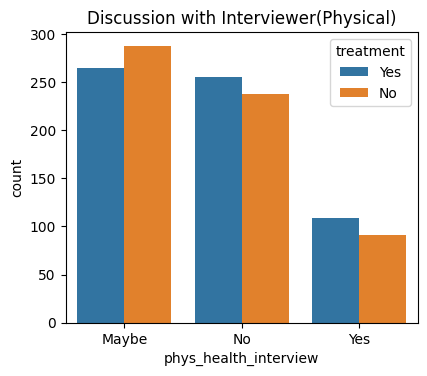

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of discussion with interviewer(physical)
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(x='phys_health_interview',hue='treatment',data=data)
plt.title('Discussion with Interviewer(Physical)')
plt.show()

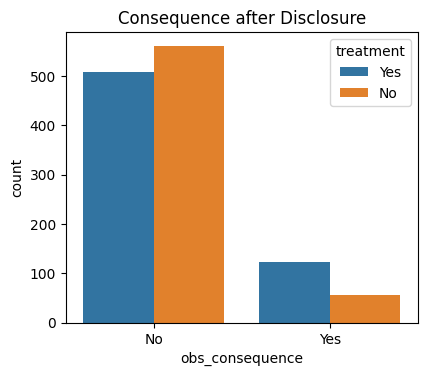

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of consequence after disclosure
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(x='obs_consequence',hue='treatment',data=data)
plt.title('Consequence after Disclosure')
plt.show()

##Descriptive Analysis


In [ ]:
# Generate descriptive statistics for all columns in the DataFrame
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,5,2,2,2,4,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,980,1107,759,630,724,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Model Building

##Handling Categorical Values

In [76]:
# Splitting the DataFrame into features (X) and target variable (y)
X = data.drop('treatment', axis = 1)
y = data['treatment']

In [77]:
# Importing necessary modules for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [78]:
# Create a ColumnTransformer to apply ordinal encoding to selected categorical features
# while preserving the remaining features
ct = ColumnTransformer ([('oe',OrdinalEncoder(), ['Gender', 'self_employed', 'family_history',
'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence'])], remainder='passthrough')

In [79]:
# Transform features using the ColumnTransformer object
X = ct.fit_transform(X)

In [80]:
# Encode the target variable using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [81]:
# Save the ColumnTransformer object using joblib
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

##Splitting Data into Train And Test

In [82]:
# Importing necessary module for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=49)

In [84]:
# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

##transform categorical features into numerical labels

In [85]:
# Importing necessary module for preprocessing
from sklearn import preprocessing

# Iterate over each feature in the DataFrame and encode its labels using LabelEncoder
# Store the label mappings in the labelDict dictionary
labelDict = {'label_' + feature: [*preprocessing.LabelEncoder().fit(data[feature]).classes_] for feature in data}

# Apply LabelEncoder to transform categorical features into numerical labels
# This replaces each categorical value with its corresponding numerical label
data = data.apply(preprocessing.LabelEncoder().fit_transform)

In [86]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,19,0,0,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,26,2,0,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,14,2,0,0,0,2,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,13,2,0,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,13,2,0,0,0,0,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


##Comparing Accuracy Of Various Models

In [87]:
# Importing classifiers and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

In [88]:
# # Create a dictionary of machine learning models
# model_dict = {}

# # Add models to the dictionary
# model_dict['Logistic regression']= LogisticRegression (solver='liblinear', random_state=49)
# model_dict['KNN Classifier'] = KNeighborsClassifier()
# model_dict['Decision Tree Classifier'] = DecisionTreeClassifier (random_state=49)
# model_dict['Random Forest Classifier'] = RandomForestClassifier (random_state=49)
# model_dict['AdaBoost Classifier'] = AdaBoostClassifier (random_state=49)
# model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
# model_dict['XGB Classifier'] = XGBClassifier(random_state=49)

###Logistic Regression

In [89]:
# Instantiate and fit the Logistic Regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

# Predict using the trained model
pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, pred_log_reg)
print('Accuracy of Logistic Regression:', accuracy_log_reg)

Accuracy of Logistic Regression: 0.7493333333333333


###KNeighborsClassifier


In [90]:
# Instantiate and fit the KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, pred_knn)
print('Accuracy of K-Nearest Neighbors:', round(accuracy_knn,4)*100)

Accuracy of K-Nearest Neighbors: 65.07


###DecisionTreeClassifier

In [91]:
# Instantiate and fit the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=49)
dt_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, pred_dt)
print('Accuracy of Decision Tree Classifier:', round(accuracy_dt,4)*100)

Accuracy of Decision Tree Classifier: 69.87


###Random Forest Classifier


In [92]:
# Instantiate and fit the Random Forest model
random_forest = RandomForestClassifier(random_state=49)
random_forest.fit(X_train, y_train)

# Predict using the trained model
pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest Classifier:', round(accuracy_rf,4)*100)

Accuracy of Random Forest Classifier: 76.8


###AdaBoost Classifier

In [93]:
# Instantiate and fit the AdaBoost Classifier model
adaboostClassifier = AdaBoostClassifier(random_state=49)
adaboostClassifier.fit(X_train, y_train)

# Predict using the trained model
pred_abc = adaboostClassifier.predict(X_test)

# Calculate accuracy
accuracy_abc = accuracy_score(y_test, pred_abc)
print('Accuracy of AdaBoost Classifier:', round(accuracy_abc,4)*100)

Accuracy of AdaBoost Classifier: 78.67


###Gradient Boosting Classifier

In [94]:
# Instantiate and fit the Gradient Boosting model
gradientBoostingClassifier = GradientBoostingClassifier(random_state=49)
gradientBoostingClassifier.fit(X_train, y_train)

# Predict using the trained model
pred_gbc = gradientBoostingClassifier.predict(X_test)

# Calculate accuracy
accuracy_gbc = accuracy_score(y_test, pred_gbc)
print('Accuracy of Gradient Boosting Classifier:', round(accuracy_gbc,4)*100)

Accuracy of Gradient Boosting Classifier: 78.4


###XGB Classifier

In [95]:
# Instantiate and fit the Random Forest model
XGBClassifier = XGBClassifier(random_state=49)
XGBClassifier.fit(X_train, y_train)

# Predict using the trained model
pred_xgb = XGBClassifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, pred_xgb)
print('Accuracy of XGB Classifier:', round(accuracy_xgb,4)*100)

Accuracy of XGB Classifier: 72.53


###Support Vector Machines (SVM)

In [96]:
from sklearn.svm import SVC

# Instantiate and fit the SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, pred_svm)
print('Accuracy of Support Vector Machines (SVM):', round(accuracy_svm, 4) * 100)

Accuracy of Support Vector Machines (SVM): 68.27


###Naive Bayes Classifier

In [97]:
from sklearn.naive_bayes import GaussianNB

# Instantiate and fit the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_nb = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of Naive Bayes Classifier:', round(accuracy_nb, 4) * 100)

Accuracy of Naive Bayes Classifier: 71.2


###Neural Networks (Multi-layer Perceptron)

In [98]:
from sklearn.neural_network import MLPClassifier

# Instantiate and fit the MLP model
mlp_classifier = MLPClassifier(random_state=49)
mlp_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_mlp = mlp_classifier.predict(X_test)

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, pred_mlp)
print('Accuracy of Neural Networks (Multi-layer Perceptron):', round(accuracy_mlp, 4) * 100)

Accuracy of Neural Networks (Multi-layer Perceptron): 77.33


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


###LightGBM

In [99]:
import lightgbm as lgb

# Instantiate and fit the LightGBM model
lgb_classifier = lgb.LGBMClassifier(random_state=49)
lgb_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_lgb = lgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_lgb = accuracy_score(y_test, pred_lgb)
print('Accuracy of LightGBM:', round(accuracy_lgb, 4) * 100)


[LightGBM] [Info] Number of positive: 441, number of negative: 431
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 872, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505734 -> initscore=0.022937
[LightGBM] [Info] Start training from score 0.022937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy of LightGBM: 73.87


###CatBoost

In [100]:
from catboost import CatBoostClassifier

# Instantiate and fit the CatBoost model
catboost_classifier = CatBoostClassifier(random_state=49, verbose=0)
catboost_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_catboost = catboost_classifier.predict(X_test)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_test, pred_catboost)
print('Accuracy of CatBoost:', round(accuracy_catboost, 4) * 100)


Accuracy of CatBoost: 78.13


###Extra Trees Classifier

In [101]:
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate and fit the Extra Trees Classifier model
extra_trees_classifier = ExtraTreesClassifier(random_state=49)
extra_trees_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_extra_trees = extra_trees_classifier.predict(X_test)

# Calculate accuracy
accuracy_extra_trees = accuracy_score(y_test, pred_extra_trees)
print('Accuracy of Extra Trees Classifier:', round(accuracy_extra_trees, 4) * 100)


Accuracy of Extra Trees Classifier: 76.0


###Stochastic Gradient Descent Classifier (SGDClassifier)

In [102]:
from sklearn.linear_model import SGDClassifier

# Instantiate and fit the SGDClassifier model
sgd_classifier = SGDClassifier(random_state=49)
sgd_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_sgd = sgd_classifier.predict(X_test)

# Calculate accuracy
accuracy_sgd = accuracy_score(y_test, pred_sgd)
print('Accuracy of SGDClassifier:', round(accuracy_sgd, 4) * 100)


Accuracy of SGDClassifier: 70.67


In [103]:
#Comparing all the model accuracy
print('Accuracy of Logistic Regression:', round(accuracy_log_reg,4)*100)
print('Accuracy of K-Nearest Neighbors:', round(accuracy_knn,4)*100)
print('Accuracy of Decision Tree Classifier:', round(accuracy_dt,4)*100)
print('Accuracy of Random Forest Classifier:', round(accuracy_rf,4)*100)
print('Accuracy of AdaBoost Classifier:', round(accuracy_abc,4)*100)
print('Accuracy of Gradient Boosting Classifier:', round(accuracy_gbc,4)*100)
print('Accuracy of XGB Classifier:', round(accuracy_xgb,4)*100)
print('Accuracy of Support Vector Machines (SVM):', round(accuracy_svm, 4) * 100)
print('Accuracy of Naive Bayes Classifier:', round(accuracy_nb, 4) * 100)
print('Accuracy of Neural Networks (Multi-layer Perceptron):', round(accuracy_mlp, 4) * 100)
print('Accuracy of LightGBM:', round(accuracy_lgb, 4) * 100)
print('Accuracy of CatBoost:', round(accuracy_catboost, 4) * 100)
print('Accuracy of Extra Trees Classifier:', round(accuracy_extra_trees, 4) * 100)


Accuracy of Logistic Regression: 74.92999999999999
Accuracy of K-Nearest Neighbors: 65.07
Accuracy of Decision Tree Classifier: 69.87
Accuracy of Random Forest Classifier: 76.8
Accuracy of AdaBoost Classifier: 78.67
Accuracy of Gradient Boosting Classifier: 78.4
Accuracy of XGB Classifier: 72.53
Accuracy of Support Vector Machines (SVM): 68.27
Accuracy of Naive Bayes Classifier: 71.2
Accuracy of Neural Networks (Multi-layer Perceptron): 77.33
Accuracy of LightGBM: 73.87
Accuracy of CatBoost: 78.13
Accuracy of Extra Trees Classifier: 76.0


From the above results, it is clear that AdaBoost Classifier provides the best accuracy. So we are selecting the AdaBoost Classifier

###Hyperparameter Tuning Of Selected Model

In [139]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for AdaBoost using a range of estimators and learning rates
# params_abc = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop=50, num = 15)],'learning_rate': [(0.97 + x/ 100) for x in range(0,8)],}
params_abc = {
    'n_estimators': [int(x) for x in np.linspace(start=1, stop=100, num=25)],
    'learning_rate': [(0.01 * x) for x in range(1, 101)]
}

# Setup RandomizedSearchCV with AdaBoost and StratifiedKFold for cross-validation
abc_random = RandomizedSearchCV(
    estimator=AdaBoostClassifier(random_state=49),
    param_distributions=params_abc,
    n_iter=100,
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1,
    random_state=49
)

# abc_random = RandomizedSearchCV(random_state=49, estimator=adaboostClassifier,param_distributions = params_abc,n_iter =100,cv=5,n_jobs=-1)

In [131]:
from sklearn.tree import DecisionTreeClassifier

params_abc = {
    'base_estimator': [DecisionTreeClassifier(max_depth=d) for d in range(1, 4)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

In [132]:
abc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=AdaBoostClassifier(random_state=49), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.06,
                                                          0.07, 0.08, 0.09, 0.1,
                                                          0.11, 0.12, 0.13,
                                                          0.14, 0.15, 0.16,
                                                          0.17, 0.18, 0.19, 0.2,
                                                          0.21, 0.22, 0.23,
                                                          0.24, 0.25, 0.26,
                                                          0.27, 0.28, 0.29, 0.3, ...],
                                        'n_estimators': [1, 5, 9, 13, 17, 21,
                                                         25, 29, 34, 38, 42, 46,
                                                         50, 54, 58, 62, 67, 71,
                                                         75, 79, 83, 87, 91, 95,
                                                         100]},
                   random_state=49)

In [133]:
# Retrieve the best parameters
abc_random.best_params_

{'n_estimators': 58, 'learning_rate': 0.08}

In [134]:
# Using the best parameters from the random search to initialize and fit an AdaBoost
abc_tuned = AdaBoostClassifier (random_state=49,n_estimators=11, learning_rate=1.02)
abc_tuned.fit(X_train,y_train)

# Make predictions with the tuned model
pred_abc_tuned = abc_tuned.predict(X_test)

print('Accuracy of AdaBoost (tuned) =', accuracy_score(y_test, pred_abc_tuned))

Accuracy of AdaBoost (tuned) = 0.7813333333333333


###Evaluating Performance Of Models

Text(50.722222222222214, 0.5, 'Actual')

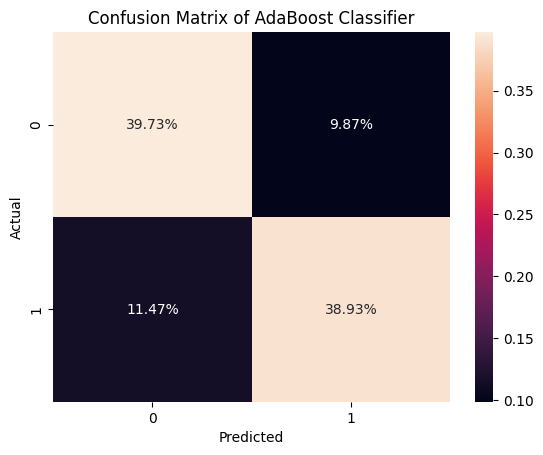

In [109]:
# Calculate and plot the confusion matrix for the initial model
cf_matrix = confusion_matrix(y_test, pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

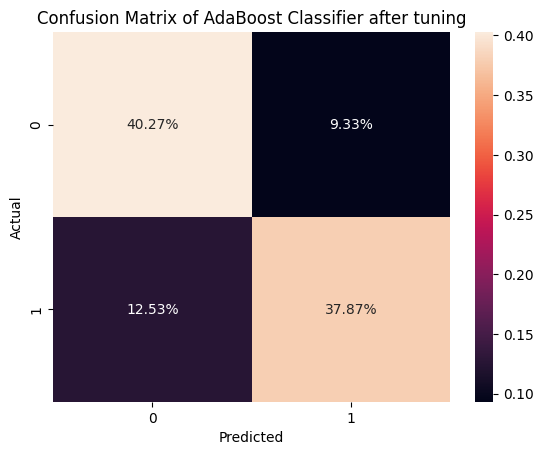

In [110]:
# Calculate and plot the confusion matrix for the tuned model
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

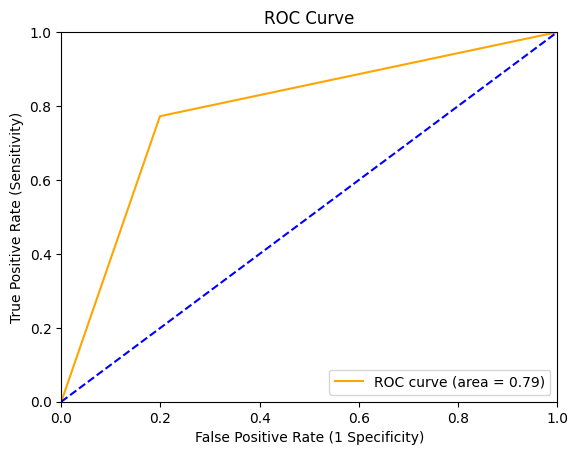

(array([0.        , 0.19892473, 1.        ]),
 array([0.        , 0.77248677, 1.        ]),
 array([2, 1, 0]))

In [111]:
# Calculate and plot the ROC curve for the initial model
from sklearn import metrics

fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

roc_curve(y_test, pred_abc)

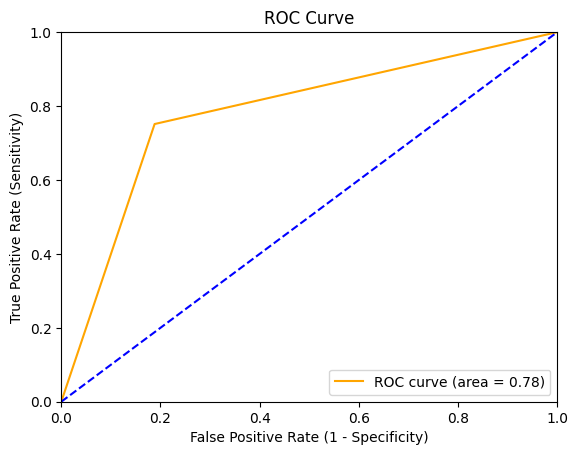

(array([0.        , 0.18817204, 1.        ]),
 array([0.        , 0.75132275, 1.        ]),
 array([2, 1, 0]))

In [112]:
# Calculate and plot the ROC curve for the tuned model
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve(y_test, pred_abc_tuned)

roc_auc_abc_tuned = metrics.auc(fpr_abc_tuned, tpr_abc_tuned)
plt.plot(fpr_abc_tuned, tpr_abc_tuned, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc_tuned)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

roc_curve(y_test, pred_abc_tuned)


In [113]:
#classification reports for initial model
print(classification_report(y_test, pred_abc))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       186
           1       0.80      0.77      0.78       189

    accuracy                           0.79       375
   macro avg       0.79      0.79      0.79       375
weighted avg       0.79      0.79      0.79       375



In [114]:
#classification reports for tuned models
print(classification_report(y_test, pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       186
           1       0.80      0.75      0.78       189

    accuracy                           0.78       375
   macro avg       0.78      0.78      0.78       375
weighted avg       0.78      0.78      0.78       375



###Saving The Model

In [137]:
import pickle
# Save the trained model to a file
pickle.dump(adaboostClassifier, open('model.pkl','wb'))
print("Model saved successfully!")


Model saved successfully!


In [138]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Directory:", current_directory)


Current Directory: /content


In [2]:
import pickle

In [19]:
model = pickle.load(open("model.pkl",'rb'))

c:\Users\shrut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: node array from the pickle has an incompatible dtype:
- expected: [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]
- got     : {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}

In [20]:
import sklearn
print(sklearn.__version__)

1.2.2
